# Final Project

## Introduction 
Using the data sets from Dataset-CKAN, we decided upon the best neighborhood in Pittsburgh based on the following safety factors: Speed bumps, City Traffic Signs, and Crosswalks. Safety is one of the most important aspects of a neighborhood, building community, and a safe place for people to live.

### Speed Bump:

Introduction: Speed Bumps are very important for the safety of neighborhoods. Speed Bumps slow down traffic, reducing speed, making it safer for pedestrians to walk and children to play. Calming traffic creates a sense of community in neighborhoods, making a safe area where people can feel comfortable. Speed Bumps can also lower accident rates in a neighborhood. They make roads safer not just for cars, but most importantly for people.

Importation of Data Set:

In [38]:
import pandas as pd
df = pd.read_csv('speed bump data.csv')
df.head(150)

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,342,2047879882,75,5343.0,Mossfield St,19094,Asphalt,Stanton Heights,9,10,42003100500,2,10,5,3-4,40.472015,-79.934367
75,343,1379652923,76,622.0,Maytide St,15244,Asphalt,Overbrook,4,32,42003320400,5,32,3,4-23,40.383984,-79.990647
76,344,965432088,77,378.0,Maytide St,15244,Asphalt,Carrick,4,29,42003290400,3,29,3,4-23,40.384498,-79.986498
77,345,724005157,78,217.0,Maytide St,16410,Asphalt,Carrick,4,29,42003290400,3,29,3,4-23,40.384359,-79.982626


These are the neighborhoods in order from most speed bumps to least speed bumps:

In [3]:
import pandas as pd
df = pd.read_csv('speed bump data.csv')
speedhump_counts = (
    df.groupby('neighborhood')       
      .size()                        
      .reset_index(name='Hump_Count')  
      .sort_values('Hump_Count', ascending=False)  
)
print(speedhump_counts)

           neighborhood  Hump_Count
15  Squirrel Hill South          18
2               Carrick           9
11          Polish Hill           6
8         North Oakland           6
10          Perry North           4
1             Brookline           4
6        Homewood South           4
13    South Side Slopes           4
17           Upper Hill           4
0            Bloomfield           3
4              Garfield           3
12     South Side Flats           3
14  Squirrel Hill North           3
7      Mount Washington           3
5         Highland Park           2
3       Central Oakland           1
9             Overbrook           1
16      Stanton Heights           1


This is a bar chart with the top 10 neighborhoods with speed bumps:

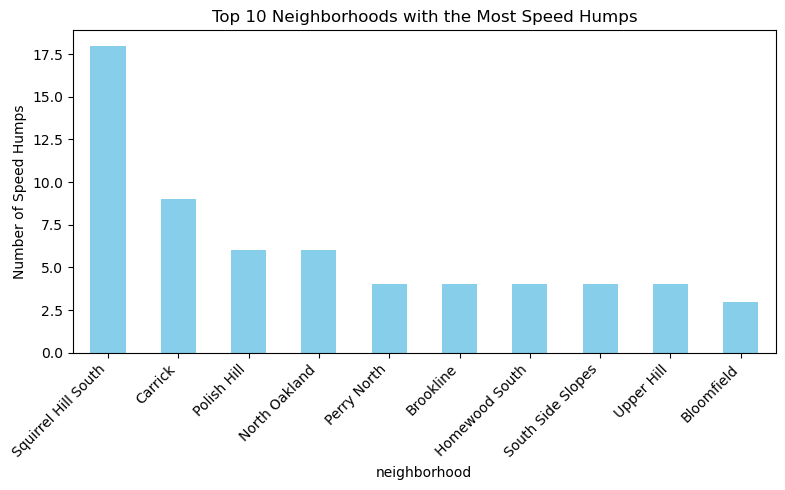

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('speed bump data.csv')
speedhump_counts = (
    df.groupby('neighborhood')       
      .size()                        
      .reset_index(name='Hump_Count')  
      .sort_values('Hump_Count', ascending=False)  
)

speedhump_counts.head(10).plot(
    x='neighborhood',
    y='Hump_Count',
    kind='bar',
    figsize=(8,5),
    title='Top 10 Neighborhoods with the Most Speed Humps',
    legend=False,
    color='skyblue'
)
plt.xlabel('neighborhood')
plt.ylabel('Number of Speed Humps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
df = pd.read_csv('speed bump data.csv')
sign_counts = df['neighborhood'].value_counts()
top10 = sign_counts.head(10)
points = list(range(10, 0, -1))
ranking = pd.DataFrame({'neighborhood': top10.index,'points': points})
print(ranking)

          neighborhood  points
0  Squirrel Hill South      10
1              Carrick       9
2        North Oakland       8
3          Polish Hill       7
4       Homewood South       6
5            Brookline       5
6    South Side Slopes       4
7          Perry North       3
8           Upper Hill       2
9           Bloomfield       1


### Crosswalks

Introduction: Crosswalks are very important for keeping pedestrians safe by providing a designated place for them to walk so cars know to look out for them. Having a greater number of crosswalks not only provides more flexibility for pedestrians to cross when they need, but also decreases their desire to jaywalk. This helps protect them from cars who don't know to watch for a person in an unmarked zone, protecting people from both physical and legal dangers. A higher level of crosswalks also indicates a more walkable area, generally meaning it would be more pleasant to live in, especially if you like to walk.

Importation of data:

In [8]:
import pandas as pd
df=pd.read_csv("IntersectionMarkings.csv")
df.head(10)

,_id,id,id_field,type,street,pavement,route_ahead,route_back,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1559483633,1,Crosswalk - Other,ELEVENTH ST,15929.0,PENN AVE,MULBERRY WAY,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,2,785965942,10,Crosswalk - Two Lined,PENN AVE,3313.0,12TH ST,ELEVENTH ST,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,3,2008474459,100,Crosswalk - Continental,MORNINGSIDE AVE,8666.0,VETTER ST,BRYANT ST,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,4,1207933462,1000,Crosswalk - Two Lined,TECH ST,5523.0,MARGARET MORRISON ST,FREW AVE,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,5,452041059,10000,Crosswalk - Continental,NaN,14199.0,MOHLER ST,FRANKSTOWN AVE,Homewood North,9.0,13.0,42003130100,2.0,13.0,5.0,3-17,40.455467,-79.884442
5,6,2143059397,10001,Stop Bar,NaN,14199.0,MOHLER ST,FRANKSTOWN AVE,Homewood North,9.0,13.0,42003130100,2.0,13.0,5.0,3-17,40.455500,-79.884463
6,7,2025526125,10002,Crosswalk - Continental,NaN,545.0,FRANKSTOWN AVE,BENNETT ST,East Hills,9.0,13.0,42003130600,2.0,13.0,5.0,3-17,40.454975,-79.880843
7,8,456996638,10003,Stop Bar,NaN,545.0,FRANKSTOWN AVE,BENNETT ST,East Hills,9.0,13.0,42003130600,2.0,13.0,5.0,3-17,40.454946,-79.880819
8,9,1280434611,10004,Crosswalk - Continental,NaN,638.0,FRANKSTOWN AVE,FELICIA WAY,Homewood South,9.0,13.0,42003130400,2.0,13.0,5.0,3-17,40.455072,-79.886450
9,10,1308246533,10005,Stop Bar,NaN,638.0,FRANKSTOWN AVE,FELICIA WAY,Homewood South,9.0,13.0,42003130400,2.0,13.0,5.0,3-17,40.455041,-79.886442


This sorts and removes anything that is not a crosswalk than sorted through and counted the amount per neighborhood.

In [9]:
diction={}
mask=df['type'].str.contains('Crosswalk')
cross=df[mask]
total=len(cross)
for index, row in cross.iterrows():
    if cross.loc[index, 'neighborhood'] in diction:
        diction[cross.loc[index,'neighborhood']]+=1
    else:
        diction[cross.loc[index,'neighborhood']]=1
sort= sorted(diction.items(), key=lambda item: item[1], reverse=True)
print(f"Sorted{sort}")

Sorted[('Central Business District', 427), ('South Side Flats', 332), ('Squirrel Hill South', 254), ('Shadyside', 227), ('Bloomfield', 203), ('East Liberty', 176), ('Strip District', 164), ('Squirrel Hill North', 140), ('North Oakland', 128), ('Mount Washington', 118), ('Central Oakland', 117), ('Homewood South', 116), ('Point Breeze', 112), ('Hazelwood', 102), ('Highland Park', 92), ('Brookline', 88), ('Bluff', 86), ('Central Lawrenceville', 86), ('Beechview', 86), ('Larimer', 83), ('Carrick', 81), ('Perry South', 81), ('North Shore', 80), ('Terrace Village', 80), ('Greenfield', 78), ('South Oakland', 77), ('Crawford-Roberts', 68), ('Brighton Heights', 65), ('East Allegheny', 64), ('Manchester', 59), ('Middle Hill', 59), ('Garfield', 56), ('Point Breeze North', 52), ('Central Northside', 52), ('Lower Lawrenceville', 50), ('Knoxville', 49), ('Morningside', 46), ('West Oakland', 46), ('Troy Hill', 45), ('Perry North', 43), ('Allegheny Center', 43), ('Homewood North', 41), ('Friendship',

Bar chart with top 10 neighborhoods with crosswalks:

<Axes: xlabel='Neighborhood'>

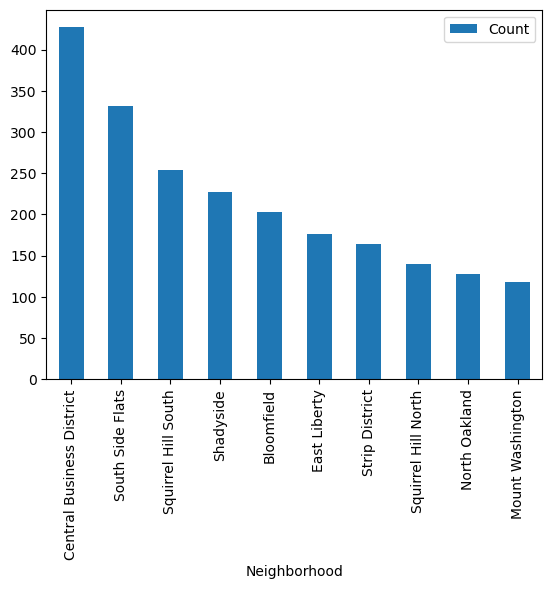

In [23]:
df = pd.DataFrame(sort, columns=['Neighborhood','Count']).head(10)
df.plot.bar(x='Neighborhood',y='Count')

Points:

In [29]:
import pandas as pd
df = pd.read_csv('IntersectionMarkings.csv')
sign_counts = df['neighborhood'].value_counts()
top10 = sign_counts.head(10)
points = list(range(10, 0, -1))
ranking = pd.DataFrame({'neighborhood': top10.index,'points': points})
print(ranking)

                neighborhood  points
0  Central Business District      10
1           South Side Flats       9
2        Squirrel Hill South       8
3                  Shadyside       7
4                 Bloomfield       6
5               East Liberty       5
6        Squirrel Hill North       4
7             Strip District       3
8           Mount Washington       2
9              North Oakland       1


### City Traffic Signs

Introduction: City traffic signs are crucial for keeping neighborhoods safe because they provide clear guidance for both drivers and pedestrians. They help prevent accidents by controlling the flow of traffic, marking speed limits, and warning people of potential hazards like sharp turns or school zones. Without them, roads would be chaotic and dangerous, especially in busy city areas. Signs also make neighborhoods more walkable and predictable, giving residents confidence that drivers will follow consistent rules.



Importation of data:

In [13]:
import pandas as pd
df = pd.read_csv('City Traffic Signs.csv')
df.head(150)

,_id,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,2,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,3,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,4,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,5,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,98452014,WF,5888,Marlborough Ave,Pittsburgh,Wood Pole,1995-08-07,Wayfinding Signage,Squirrel Hill North,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-18,40.438762,-79.919519
146,147,763168594,WF,1070,Morewood Ave,Pittsburgh,Wood Pole,1995-04-06,Wayfinding Signage,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.445655,-79.942499
147,148,892900715,WF,5057,5th Ave,Pittsburgh,Metal Pole,1995-04-06,Wayfinding Signage,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,2-26,40.447671,-79.940161
148,149,1834440833,WF,NaN,NaN,Pittsburgh,Metal Pole,1995-04-06,Wayfinding Signage,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-9,40.447349,-79.942864


Neighborhood with most traffic signs:

In [14]:
import pandas as pd

df = pd.read_csv('City Traffic Signs.csv')

sign_counts = df['neighborhood'].value_counts().reset_index()
sign_counts.columns = ['neighborhood', 'sign_count']
sign_counts = sign_counts.sort_values(by='sign_count', ascending=False)

sign_counts

,neighborhood,sign_count
0,South Side Flats,3672
1,Bloomfield,3627
2,Central Business District,3491
3,Shadyside,3370
4,Squirrel Hill South,3281
...,...,...
86,Ridgemont,62
87,Chartiers City,44
88,Glen Hazel,38
89,Arlington Heights,21


Bar Chart of top 10 neighborhoods with traffic signs:

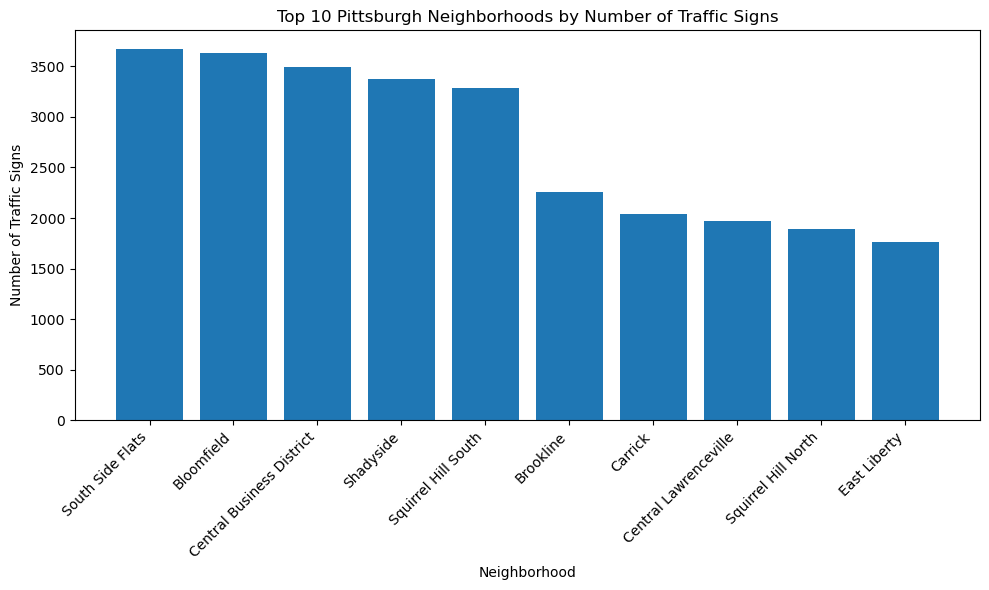

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('City Traffic Signs.csv')

sign_counts = df['neighborhood'].value_counts().reset_index()
sign_counts.columns = ['neighborhood', 'sign_count']

top_10 = sign_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10['neighborhood'], top_10['sign_count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Traffic Signs')
plt.title('Top 10 Pittsburgh Neighborhoods by Number of Traffic Signs')
plt.tight_layout()
plt.show()

Points:


In [31]:
import pandas as pd
df = pd.read_csv('City Traffic Signs.csv')
sign_counts = df['neighborhood'].value_counts()
top10 = sign_counts.head(10)
points = list(range(10, 0, -1))
ranking = pd.DataFrame({'neighborhood': top10.index,'points': points})
print(ranking)

                neighborhood  points
0           South Side Flats      10
1                 Bloomfield       9
2  Central Business District       8
3                  Shadyside       7
4        Squirrel Hill South       6
5                  Brookline       5
6                    Carrick       4
7      Central Lawrenceville       3
8        Squirrel Hill North       2
9               East Liberty       1


### Final Rankings:

Finally, we took the top 10 neighborhoods with the most points and combined the points within each data set to find the neighborhood with the most points.

In [37]:
import pandas as pd
df1 = pd.read_csv('speed bump data.csv')
top1 = df1['neighborhood'].value_counts().head(10)
rank1 = pd.DataFrame({'neighborhood': top1.index, 'points': list(range(10, 0, -1))})
df2 = pd.read_csv('City Traffic Signs.csv')
top2 = df2['neighborhood'].value_counts().head(10)
rank2 = pd.DataFrame({'neighborhood': top2.index, 'points': list(range(10, 0, -1))})
df3 = pd.read_csv('IntersectionMarkings.csv')
top3 = df3['neighborhood'].value_counts().head(10)
rank3 = pd.DataFrame({'neighborhood': top3.index, 'points': list(range(10, 0, -1))})
combined = pd.concat([rank1, rank2, rank3])
total_points = combined.groupby('neighborhood', as_index=False)['points'].sum()
counts = combined['neighborhood'].value_counts()
multi_appearance = counts[counts > 1].index
total_points = total_points[total_points['neighborhood'].isin(multi_appearance)]
top10_total = total_points.sort_values(by='points', ascending=False).head(10)
print(top10_total)

                 neighborhood  points
15        Squirrel Hill South      24
12           South Side Flats      19
3   Central Business District      18
0                  Bloomfield      16
11                  Shadyside      14
2                     Carrick      13
1                   Brookline      10
8               North Oakland       9
5                East Liberty       6
14        Squirrel Hill North       6


Squirrel Hill South was the neighborhood with the most points, which makes it the best neighborhood in Pittsburgh. We agree with this claim because Squirrel Hill South was in the top 4 if each data set.